In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
# % matplotlib inline

In [20]:
df = pd.read_csv("data/FUEL_CONSUMPTION.csv")
df.head()

,MODEL YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL TYPE,FUEL CONSUMPTION*,HWY (L/100 km),COMB (L/100 km),COMB (mpg),CO2 EMISSIONS
0,2010,ACURA,CSX,COMPACT,2.0,4.0,AS5,X,10.9,7.8,9.5,30.0,219.0
1,2010,ACURA,CSX,COMPACT,2.0,4.0,M5,X,10.0,7.6,8.9,32.0,205.0
2,2010,ACURA,CSX,COMPACT,2.0,4.0,M6,Z,11.6,8.1,10.0,28.0,230.0
3,2010,ACURA,MDX AWD,SUV,3.7,6.0,AS6,Z,14.8,11.3,13.2,21.0,304.0
4,2010,ACURA,RDX AWD TURBO,SUV,2.3,4.0,AS5,Z,13.2,10.3,11.9,24.0,274.0


In [21]:
column_means = df.mean()
df = df.fillna(column_means)
df.isnull().sum()

MODEL YEAR           17
MAKE                  7
MODEL                26
VEHICLE CLASS        26
ENGINE SIZE           0
CYLINDERS             0
TRANSMISSION         26
FUEL TYPE            26
FUEL CONSUMPTION*     0
HWY (L/100 km)        0
COMB (L/100 km)       0
COMB (mpg)            0
CO2 EMISSIONS         0
dtype: int64

In [22]:
df.columns

Index(['MODEL YEAR', 'MAKE', 'MODEL', 'VEHICLE CLASS', 'ENGINE SIZE',
       'CYLINDERS', 'TRANSMISSION', 'FUEL TYPE', 'FUEL CONSUMPTION*',
       'HWY (L/100 km)', 'COMB (L/100 km)', 'COMB (mpg)', 'CO2 EMISSIONS'],
      dtype='object')

In [23]:
df = df[['ENGINE SIZE','CYLINDERS','FUEL CONSUMPTION*','HWY (L/100 km)','COMB (L/100 km)','CO2 EMISSIONS']]
df.head(10)

,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION*,HWY (L/100 km),COMB (L/100 km),CO2 EMISSIONS
0,2.0,4.0,10.9,7.8,9.5,219.0
1,2.0,4.0,10.0,7.6,8.9,205.0
2,2.0,4.0,11.6,8.1,10.0,230.0
3,3.7,6.0,14.8,11.3,13.2,304.0
4,2.3,4.0,13.2,10.3,11.9,274.0
5,3.7,6.0,14.7,10.6,12.9,297.0
6,3.5,6.0,13.1,8.9,11.2,258.0
7,3.7,6.0,13.8,9.6,11.9,274.0
8,3.7,6.0,13.4,9.5,11.6,267.0
9,2.4,4.0,11.0,7.8,9.5,219.0


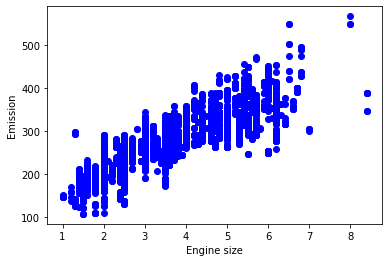

In [24]:
plt.scatter(df["ENGINE SIZE"], df["CO2 EMISSIONS"],  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

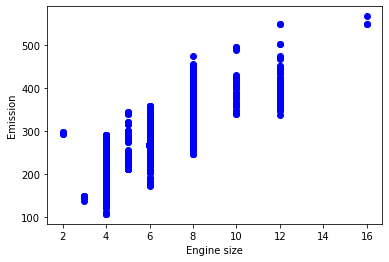

In [25]:
plt.scatter(df["CYLINDERS"], df["CO2 EMISSIONS"],  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

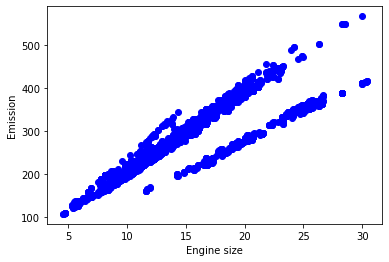

In [26]:
plt.scatter(df["FUEL CONSUMPTION*"], df["CO2 EMISSIONS"],  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

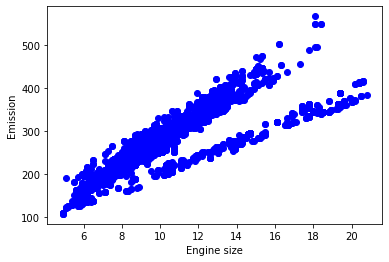

In [27]:
plt.scatter(df["HWY (L/100 km)"], df["CO2 EMISSIONS"],  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

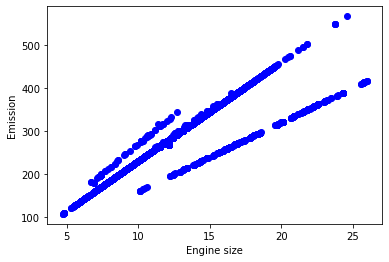

In [28]:
plt.scatter(df["COMB (L/100 km)"], df["CO2 EMISSIONS"],  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [29]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

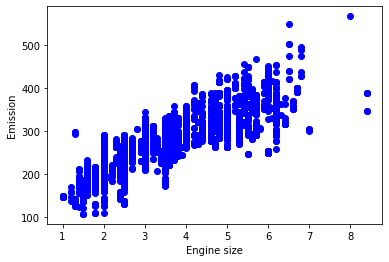

In [30]:
plt.scatter(train["ENGINE SIZE"], train["CO2 EMISSIONS"],  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [31]:
df.isnull().sum()

ENGINE SIZE          0
CYLINDERS            0
FUEL CONSUMPTION*    0
HWY (L/100 km)       0
COMB (L/100 km)      0
CO2 EMISSIONS        0
dtype: int64

In [32]:
column_means = df.mean()
df = df.fillna(column_means)
df.isnull().sum()

ENGINE SIZE          0
CYLINDERS            0
FUEL CONSUMPTION*    0
HWY (L/100 km)       0
COMB (L/100 km)      0
CO2 EMISSIONS        0
dtype: int64

In [33]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINE SIZE','CYLINDERS','COMB (L/100 km)']])
y = np.asanyarray(train[['CO2 EMISSIONS']])
regr.fit (x, y)
print ('Coefficients: ', regr.coef_)

Coefficients:  [[9.60506439 8.19897219 9.67405587]]


In [34]:
y_hat= regr.predict(test[['ENGINE SIZE','CYLINDERS','COMB (L/100 km)']])
x = np.asanyarray(test[['ENGINE SIZE','CYLINDERS','COMB (L/100 km)']])
y = np.asanyarray(test[['CO2 EMISSIONS']])
print("Mean Squared error(MSE): %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Mean Squared error(MSE): 585.98
Variance score: 0.86


In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make predictions on the test data
y_hat = regr.predict(test[['ENGINE SIZE','CYLINDERS','COMB (L/100 km)']])

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(test[['CO2 EMISSIONS']], y_hat)
print(f'Mean Absolute Error (MAE): {mae}')

Mean Absolute Error (MAE): 17.759699046154985


In [37]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(test[['CO2 EMISSIONS']], y_hat)
# # Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')


Root Mean Squared Error (RMSE): 24.20697612946844


In [38]:
# Calculate R-squared (R2) score
r2 = r2_score(test[['CO2 EMISSIONS']], y_hat)
print(f'R-squared (R2) Score: {r2}')

R-squared (R2) Score: 0.8623359071441441
